# Lab：Titanic EDA

This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 0: Import Libraries

In [2]:
# Import Python statistica and visualization libraries: pandas, numpy, matplotlib, and seaborn
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Step 1: Reading the Data

### 1.1 Import Data

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df.shape

(891, 12)

In [5]:
# Preview first 5 lines of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.2 Datatype Summary

| Feature     | Type    | Dataset   | Description                                                                                |
|-------------|---------|-----------|--------------------------------------------------------------------------------------------|
| PassengerId | int64   | train.csv | Passenger ID                                                                               |
| Survived    | int64   | train.csv | Survived or Not                                                                            |
| Pclass      | int64   | train.csv | Class of Travel                                                                            |
| Name        | object  | train.csv | Name of Passenger                                                                          |
| Sex         | Object  | train.csv | Gender                                                                                     |
| Age         | float64 | train.csv | Age of Passengers                                                                          |
| SibSp       | int64   | train.csv | Number of Sibling/Spouse aboard                                                            |
| Parch       | int64   | train.csv | Number of Parent/Child aboard                                                              |
| Ticket      | Object  | train.csv | 2017 ACT Reading Score                                                                     |
| Fare        | float64 | train.csv | Ticker Fare                                                                                |
| Cabin       | Object  | train.csv | Cabin Number                                                                               |
| Embarked    | Object  | train.csv | The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown |


## Step 2: Cleaning the data

### 2.1 Create a bar chart showing how many missing values are in each column

In [6]:
# Calculate the missing values in each column
miss_vals = df.isnull().sum()
# print(miss_vals)

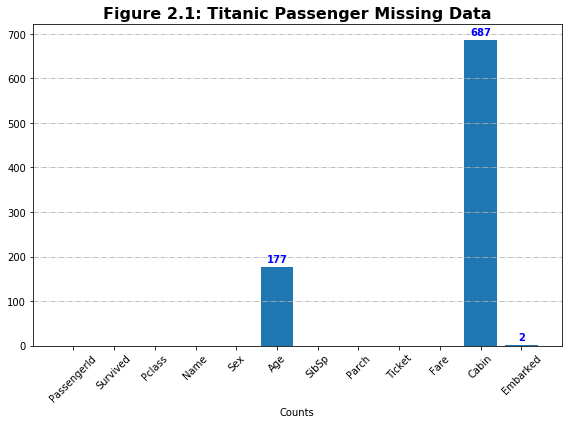

In [7]:
plt.figure(figsize = (8,6))
ax_mv = plt.bar(miss_vals.keys(),miss_vals) # plot bar chart
plt.title('Figure 2.1: Titanic Passenger Missing Data', size = 16, weight = "semibold") # name title
plt.xlabel('Counts') # name x-axis
plt.xticks(rotation = 45)
plt.grid(linestyle = '-.', axis = 'y')

# Label the bars
'''use plt.text (x, y, label, options)

   get x, y, label using plt.patches
   plt.patches returns xy: turple (float, float), the bottom and left rectangle coordintes
                       width: rectangle width
                       height: rectangle height which is equal the value.
   extract the value, use .get_xy(), .get_width(), and .get_height()'''

label = [miss_val for miss_val in miss_vals] #create a list of missing values   
for i in ax_mv.patches: # go through the features of each bars (e.g., xy, width, height)
    if i.get_height() != 0:
        plt.text(i.get_xy()[0]+0.4, i.get_height()+10, s = i.get_height(), size = 10, ha = 'center', color = 'b', \
                weight = 'bold')

plt.tight_layout();

### 2.2 Which column has the most `NaN` values? How many cells in that column are empty?
> Column: 'Cabin' has the most 'NaN', total of 687 (based on the bar chart plot in **2.1**

### 2.3 Delete all rows where 'Embarked' is empty
> Two rows are deleted

In [8]:
# Review the size of df
df.shape

(891, 12)

In [9]:
# Preview the rows where 'Embarked' is empty
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
# Drop rows only when 'Embarked' is NaN and check the size of df
df.dropna(subset = ['Embarked'], inplace = True)
df.shape

(889, 12)

### 2.4 Fill empty carbins with **¯\\_(ツ)_/¯**

In [11]:
# Check the first 5 rows before filling the new values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Right a function to replance NaN with ¯\\_(ツ)_/¯
carbin_smile = lambda x: '¯\\_(ツ)_/¯' if str(x) == 'nan' else x

In [13]:
# Map the cabin column using the function above
df['Cabin'] = df['Cabin'].map(carbin_smile)

In [14]:
# Check the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S


## Step 3: Feature extraction
### 3.1 Create a new column called 'FamilyCount' = 'SibSp' + 'Parch'

In [15]:
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0


### 3.2 Create a column called 'IsReverend': 1 if they'are a preacher, 0 if they're not.

In [17]:
# Add a title column
df['Title'] = df['Name'].map(lambda x: x[x.index(',')+2:x.index('.')])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,Mr


In [18]:
# Create a set of unique titles
name_array = np.ravel(df['Name'])
titles = [name[name.index(',')+2:name.index('.')] for name in name_array] # construct through str slicing
title_set = set(titles)
print(title_set)

{'Capt', 'Master', 'Lady', 'the Countess', 'Don', 'Mme', 'Mlle', 'Col', 'Dr', 'Sir', 'Miss', 'Mr', 'Ms', 'Major', 'Rev', 'Jonkheer', 'Mrs'}


> **Based on the above title set, the special title for Reverends is 'Rev'.**

In [19]:
df['IsReverend'] = df['Title'].map(lambda x: 1 if x == 'Rev' else 0)
df['IsReverend'].sort_values(ascending = False).head(10)

249    1
886    1
626    1
149    1
150    1
848    1
890    0
294    0
301    0
300    0
Name: IsReverend, dtype: int64

### 3.3 Create dummy columns for Embark Locations ('C', 'S', and 'Q') , Sex ('male' and 'female'), and Titles

#### 3.3a Embark Location Dummies

In [20]:
# Create dummy values for Embarked Locations
df[['Embarked_C','Embarked_Q','Embarked_S']] = pd.get_dummies(df['Embarked'])

#### 3.3b Sex Dummies

In [21]:
# Create dummy values for Sex
df[['Sex_F', 'Sex_M']] = pd.get_dummies(df['Sex'])

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_F,Sex_M
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,Mr,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,Miss,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,Mr,0,0,0,1,0,1


#### 3.3c Title Dummies

In [23]:
# Create list of titles as columns
title_list = ['T_Capt','T_Col','T_Don','T_Dr','T_Jonkheer','T_Lady','T_Major','T_Master',
              'T_Miss','T_Mlle','T_Mme','T_Mr','T_Mrs','T_Ms','T_Rev','T_Sir','T_the Countess']
# create title dummies
df[title_list] = pd.get_dummies(df['Title'])
df[['Age','Name']].sort_values(by='Age', ascending = False).head()

,Age,Name
630,80.0,"Barkworth, Mr. Algernon Henry Wilson"
851,74.0,"Svensson, Mr. Johan"
493,71.0,"Artagaveytia, Mr. Ramon"
96,71.0,"Goldschmidt, Mr. George B"
116,70.5,"Connors, Mr. Patrick"


## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

### 4.1 What was the survival rate overall?
> Based on the following calculation. The overall survival rate is **38.2%**.

In [24]:
# Overall Survival Rate
psg_all = df.shape[0]
psg_surv = df['Survived'].sum()
psg_surv_rate = psg_surv / psg_all
print(f'The overall survival rate is {round(psg_surv_rate * 100, 1)}%.')

The overall survival rate is 38.2%.


### 4.2 Which gender fared the worst? What was their survival rate?
> 1. The **female** fared the worst with average fare of 44.25 dollars compared to average fare of 25.52 dollars for male passengers.
> 2. The female passenger survival rate is **74.0%**.

In [25]:
# Calculate population by sex and create sex mask
psg_m = df['Sex_M'].sum() # Calculate male passerger population
psg_f = df['Sex_F'].sum() # Calculate female passenger population
male = df['Sex_M'] == 1   # mask for male
female = df['Sex_F'] == 1 # mask for female

In [26]:
# Calculate the average fare by sex
psg_m_avefare = df[male]['Fare'].mean()
psg_f_avefare = df[female]['Fare'].mean()
print(f'The average fare for male passenger is ${round(psg_m_avefare, 2)}, and \
      \nthe average fare for female passenger is ${round(psg_f_avefare, 2)}.') 
print(f'Therefore, female passengers were fared worse.')

The average fare for male passenger is $25.52, and       
the average fare for female passenger is $44.25.
Therefore, female passengers were fared worse.


In [27]:
# Calculate femle passenger survival rate
psg_f_surv = df[female]['Survived'].sum()
psg_f_surv_rate = psg_f_surv / psg_f
print(f'The female passenger survival rate is {round(psg_f_surv_rate * 100, 1)}%.')

The female passenger survival rate is 74.0%.


### 4.3 What was the survival rate for each Pclass?
> The survival rate for each class is summarized below:

|Pclass|Passenger|Survived|Survival Rate|
|------|---------|--------|-------------|
|     1|      214|     134|        62.6%|
|     2|      184|      87|        47.3%|
|     3|      491|     119|        23.2%|

In [28]:
# Calculate the number of passengers for each PClass
psg_pclass = df.groupby('Pclass')['Pclass'].agg('count')
print(f'Number of passengers by Travel Class:\
      \n{psg_pclass}')

Number of passengers by Travel Class:      
Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64


In [29]:
# Calculate the number of survivors for each PClass
psg_pclass_surv = df.groupby('Pclass')['Survived'].agg('sum')
print(f'Number of survivors by Travel Class:\
      \n{psg_pclass_surv}.')

Number of survivors by Travel Class:      
Pclass
1    134
2     87
3    119
Name: Survived, dtype: int64.


In [30]:
# Calculate the survival for each PClass
psg_pclass_surv_rate = psg_pclass_surv / psg_pclass
print(f'The survival rate for each Travel Class: \
      \n{round(psg_pclass_surv_rate, 3)}')

The survival rate for each Travel Class:       
Pclass
1    0.626
2    0.473
3    0.242
dtype: float64


In [31]:
# Combine a the above infomration into a table
df_pclass_surv = pd.DataFrame(dict(Passenger = psg_pclass,
                                   Survived = psg_pclass_surv, 
                                   Survival_Rate = psg_pclass_surv_rate)).reset_index()
df_pclass_surv

,Pclass,Passenger,Survived,Survival_Rate
0,1,214,134,0.626168
1,2,184,87,0.472826
2,3,491,119,0.242363


### 4.4 Did any reverends survive? How many?
> There were **6** reverends aboard

> There was **0** reverends survived.

In [32]:
# Calculate total number of reverends
psg_rev = df['T_Rev'].sum()
print(f'There are {psg_rev} reverends aboard.')

There are 6 reverends aboard.


In [33]:
rev = df["T_Rev"] == 1 
psg_rev_surv = df[rev]['Survived'].sum()
print(f'There is {psg_rev_surv} reverend survivied.')

There is 0 reverend survivied.


### 4.5 What is the survival rate for cabins marked **¯\\(ツ)/¯**
> The survival rate for cabins marked ¯\\_(ツ)_/¯ is **30.0%**.

In [34]:
# Calculate total number of cabins marked ¯\_(ツ)_/¯ and create mask
cabin_smile = df['Cabin'] == '¯\\_(ツ)_/¯'
psg_cab_sm = df[cabin_smile]['Cabin'].count()
print(f'There are {psg_cab_sm} cabins marked ¯\\_(ツ)_/¯.')

There are 687 cabins marked ¯\_(ツ)_/¯.


In [35]:
# Calculate total survivor in cabins marked ¯\_(ツ)_/¯
psg_cab_sm_surv = df[cabin_smile]['Survived'].sum()
print(f'There are {psg_cab_sm_surv} survived in cabn ¯\\_(ツ)_/¯.')

There are 206 survived in cabn ¯\_(ツ)_/¯.


In [36]:
# Calculate the survival rate for carbins marked ¯\_(ツ)_/¯
psg_cab_sm_surv_rate = psg_cab_sm_surv / psg_cab_sm
print(f'The survival rate for cabins marked ¯\\_(ツ)_/¯ is {round(psg_cab_sm_surv_rate * 100, 1)}%.')

The survival rate for cabins marked ¯\_(ツ)_/¯ is 30.0%.


### 4.6 What is the survival rate for people whose Age is empty?
>The survival rate for people whose Age is empty is **29.4%**.

In [37]:
# Calculate the number of passengers with unknown age
empty_age = df['Age'].isna()
psg_age = df[empty_age].shape[0]
print(f'There are {psg_age} passengers with unknown age.')

There are 177 passengers with unknown age.


In [38]:
# Calculate the number of survivors with unknown age
psg_age_surv = df[empty_age]['Survived'].sum()
print(f'There are {psg_age_surv} survivors with unknown age.')

There are 52 survivors with unknown age.


In [39]:
# Calculate the survival rate for people whose Age is empty
psg_age_surv_rate = psg_age_surv / psg_age
print(f'The survival rate for people whose Age is empty is {round(psg_age_surv_rate * 100, 1)}%.')

The survival rate for people whose Age is empty is 29.4%.


### 4.7 What is the survival rate for each port of embarkation?
> The survival rate for each port of embarkation is summrized below:

|Embarked|Passenger|Survived|Survival Rate|
|--------|---------|--------|-------------|
|       C|      168|      93|        55.4%|
|       Q|       77|      30|        40.0%|
|       S|      644|     217|        33.7%|

In [40]:
# Calculate the number of passengers by Embark Locations
psg_embk = df.groupby('Embarked')['Embarked'].agg('count')
print(f'The number of passengers by Embark locations: \
      \n{psg_embk}')

The number of passengers by Embark locations:       
Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


In [41]:
# Calculate the number of survivors by Embark Locations
psg_embk_surv = df.groupby('Embarked')['Survived'].agg('sum')
print(f'The number of survivors by Embark locations: \
      \n{psg_embk_surv}')

The number of survivors by Embark locations:       
Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64


In [42]:
# Calculate the survival rate by Embark Locations
psg_embk_surv_rate = psg_embk_surv / psg_embk
print(f'The survival rate by Embark locations: \
      \n{psg_embk_surv_rate}')

The survival rate by Embark locations:       
Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64


In [43]:
df_psg_embk = pd.DataFrame(dict(Passenger = psg_embk, 
                              Survivor = psg_embk_surv,
                              Survival_Rate = psg_embk_surv_rate)).reset_index()
df_psg_embk

,Embarked,Passenger,Survivor,Survival_Rate
0,C,168,93,0.553571
1,Q,77,30,0.389610
2,S,644,217,0.336957


### 4.8 What is the survival rate for children (under 12) in each Pclass?
> The survival rate for children in each Pclass is summarized below:

|Pclass|Children|Survived|Survival Rate|
|------|--------|--------|-------------|
|     1|       4|       3|        75.0%|
|     2|      17|      17|       100.0%|
|     3|      47|      19|        40.4%|

In [44]:
# Calculate the number of childrens in each Pclass
child = df['Age'] < 12
psg_pclass_ch = df[child].groupby('Pclass')['Pclass'].agg('count')
print(f'The number of childer in each Pclass is \
      \n{psg_pclass_ch}.')

The number of childer in each Pclass is       
Pclass
1     4
2    17
3    47
Name: Pclass, dtype: int64.


In [45]:
# Calculate the number of childrens survived in each Pclass
psg_pclass_ch_surv = df[child].groupby('Pclass')['Survived'].agg('sum')
print(f'The number of childer survived in each Pclass is \
      \n{psg_pclass_ch_surv}.')

The number of childer survived in each Pclass is       
Pclass
1     3
2    17
3    19
Name: Survived, dtype: int64.


In [46]:
# Calculate the survival rate for children in each Pclass
psg_pclass_ch_surv_rate = psg_pclass_ch_surv / psg_pclass_ch
print(f'The survival rate for children in each Pclass: \
      \n{psg_pclass_ch_surv_rate}')

The survival rate for children in each Pclass:       
Pclass
1    0.750000
2    1.000000
3    0.404255
dtype: float64


In [47]:
df_pclass_ch = pd.DataFrame(dict(Children = psg_pclass_ch, 
                                 Survivied = psg_pclass_ch_surv, 
                                 Survival_Rate = psg_pclass_ch_surv_rate)).reset_index()
df_pclass_ch

,Pclass,Children,Survivied,Survival_Rate
0,1,4,3,0.750000
1,2,17,17,1.000000
2,3,47,19,0.404255


### 4.9 Did the captain of the ship survive? Is he on the list?
> The name of the Titanic's Captain is Edward J. Smith. Based on the following search, he is not on the list.
So there is no evidence from the given data that supports whether the Capt. Smith survived.

In [48]:
# Find passenger whose Title is Capt
capt = df[df['T_Capt'] == 1][['Survived','Name','Sex','Age']]
capt

,Survived,Name,Sex,Age
745,0,"Crosby, Capt. Edward Gifford",male,70.0


In [49]:
# Find passenger whose name contains Smith.
df[df['Name'].str.contains('Smith')][['Survived','Pclass','Name','Sex','Age','Fare']]

,Survived,Pclass,Name,Sex,Age,Fare
174,0,1,"Smith, Mr. James Clinch",male,56.0,30.6958
260,0,3,"Smith, Mr. Thomas",male,NaN,7.7500
284,0,1,"Smith, Mr. Richard William",male,NaN,26.0000
346,1,2,"Smith, Miss. Marion Elsie",female,40.0,13.0000


### 4.10 Of all the people that died, who had the most expensive ticket? How much did it cost?
> Mr. Charles Alexander Fortune (19) and Mr. Mark Fortune (64) both paid 263 pounds (1st Class) for the tickets.
Neither of them survived.

In [50]:
# Find the person paid the most expensive ticket and did not survive.
vict = df['Survived'] == 0
psg_died_fare = df[vict][['Pclass','Name','Sex','Age','Fare']].sort_values(by = 'Fare', ascending = False)
psg_died_fare.head()

,Pclass,Name,Sex,Age,Fare
27,1,"Fortune, Mr. Charles Alexander",male,19.0,263.0000
438,1,"Fortune, Mr. Mark",male,64.0,263.0000
118,1,"Baxter, Mr. Quigg Edmond",male,24.0,247.5208
557,1,"Robbins, Mr. Victor",male,NaN,227.5250
527,1,"Farthing, Mr. John",male,NaN,221.7792


### 4.11 Does having family on the boat help or hurt your chances of survival?
>The survival rate for passengers traveling with family member is **50.6%**. Much higher than the overall survival rate of **38.2%**.

In [51]:
# Calculate number of passengers traveling with family members
family = df['FamilyCount'] > 0
psg_w_family = df[family]['FamilyCount'].count()
print(f'There are {psg_w_family} passengers traveled with family members.')

There are 354 passengers traveled with family members.


In [52]:
# Calculate number of survivors traveling with family members
psg_w_family_surv = df[family]['Survived'].sum()
print(f'There are {psg_w_family_surv} survivors traveled with family members.')

There are 179 survivors traveled with family members.


In [53]:
# Calculate the survival rate for passengers traveling with family members
psg_w_family_surv_rate = psg_w_family_surv / psg_w_family
print(f'The survival rate for passengers traveling with family member is {round(psg_w_family_surv_rate * 100, 1)}%.')

The survival rate for passengers traveling with family member is 50.6%.


## Step 5: Plotting Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


### Figure 5.1 Survival Rate by Age
> Observation #1: Female passengers at all age for Class 1 and 2 have relatively higher survival rates. For Class 3, the survival rate drops.

> Observation #2: Male passengers generally have lower survival rate than females. Within male passengers, class 1 and class 2 passengers have relatively higher survival rate than class 3 male passengers. Younger passengers have higher survival rates than elder passengers cross all classes.

> Family Count could be another potential test but the sample.

In [54]:
# Prepare DataFrame
df_age = df.groupby(['Age','Pclass','Sex'])['Survived'].agg(['sum','count']).reset_index()
df_age['surv_by_age'] = df_age['sum'] / df_age['count']
df_age.tail()

,Age,Pclass,Sex,sum,count,surv_by_age
277,70.0,2,male,0,1,0.0
278,70.5,3,male,0,1,0.0
279,71.0,1,male,0,2,0.0
280,74.0,3,male,0,1,0.0
281,80.0,1,male,1,1,1.0


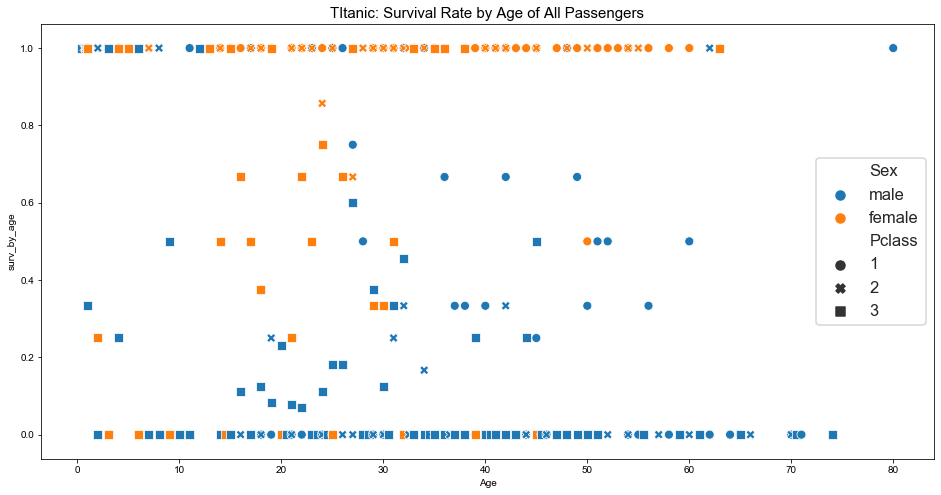

In [55]:
plt.figure(figsize = (16,8))
plt.title("TItanic: Survival Rate by Age of All Passengers", size = 15)
sns.set_style('whitegrid')
sns.set_context('talk')
sns.scatterplot(x = 'Age', y = 'surv_by_age', hue='Sex', style='Pclass', data=df_age)
plt.tight_layout;

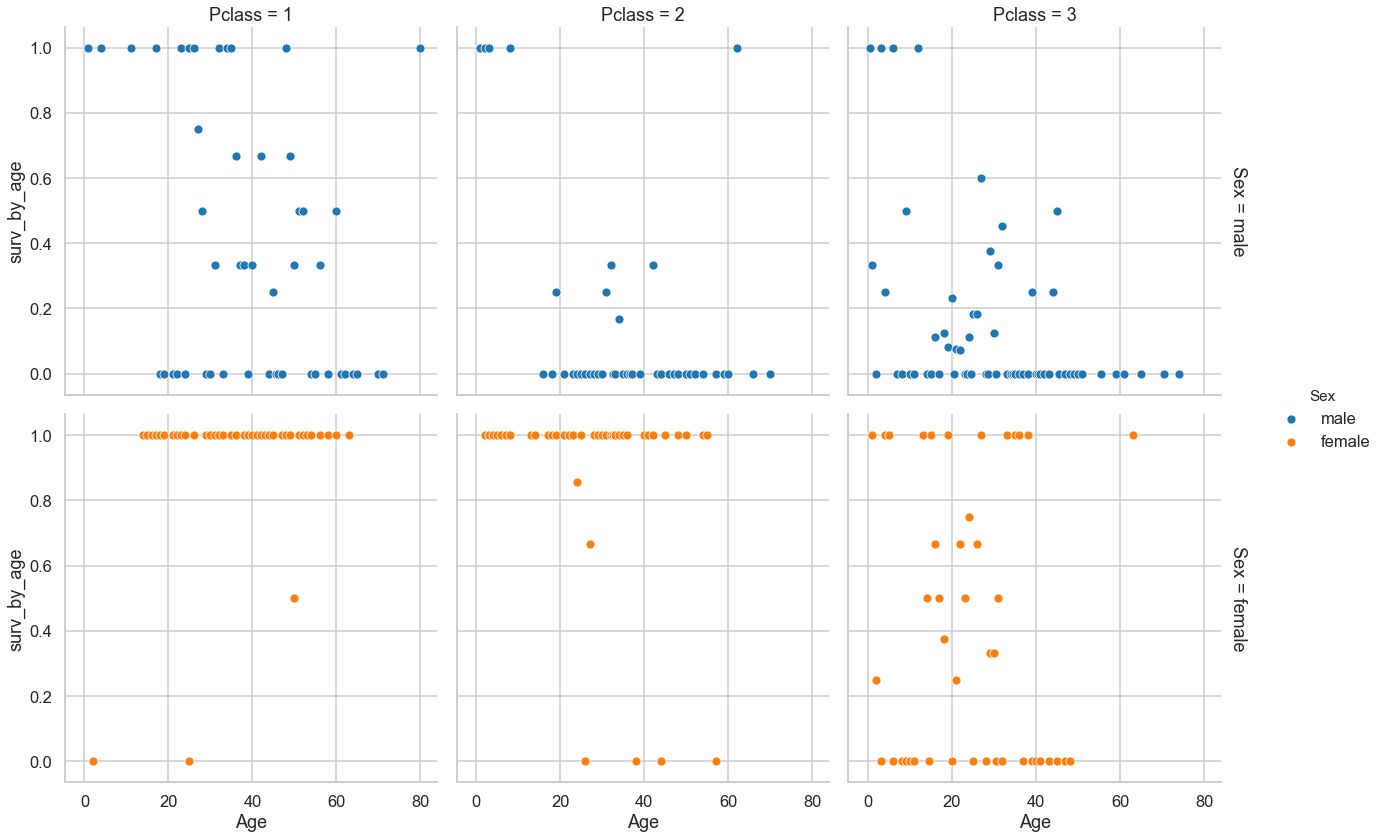

In [56]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.FacetGrid(df_age, col="Pclass", row='Sex', hue='Sex', 
                  margin_titles = True, height=6)
g.map(sns.scatterplot, 'Age', 'surv_by_age')
g.add_legend();

### Figure 5.2 Survival Rate by Family Size

> Just testing and practise . Not as informative as Fig 5.1. See summary for Fig 5.1

In [57]:
# Prepare DataFrame
df_family = df.groupby(['FamilyCount','Pclass','Sex'])['Survived'].agg(['sum','count']).reset_index()
df_family['surv_by_family'] = df_age['sum'] / df_age['count']
df_family.tail()

,FamilyCount,Pclass,Sex,sum,count,surv_by_family
34,6,3,male,1,4,0.0
35,7,3,female,0,2,0.0
36,7,3,male,0,4,1.0
37,10,3,female,0,3,0.0
38,10,3,male,0,4,0.0


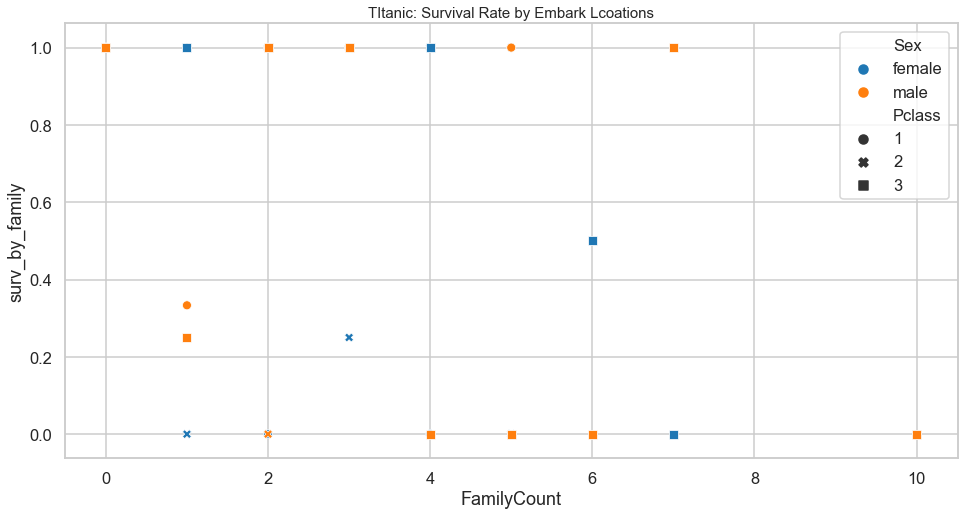

In [59]:
plt.figure(figsize = (16,8))
plt.title("TItanic: Survival Rate by Embark Lcoations", size = 15)
sns.set_style('whitegrid')
sns.set_context('talk')
sns.scatterplot(x = 'FamilyCount', y = 'surv_by_family', hue='Sex', style='Pclass', data=df_family)
plt.tight_layout;

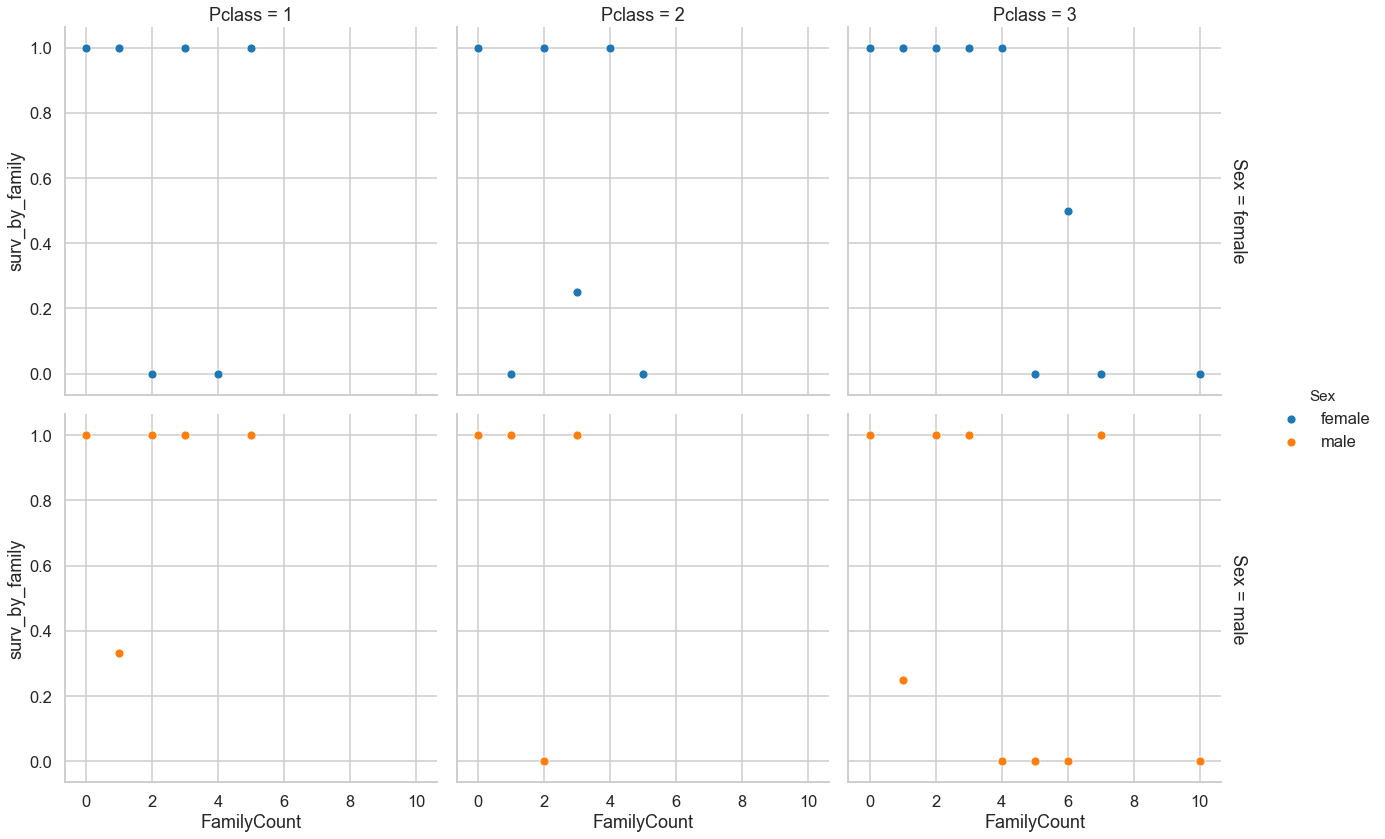

In [60]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.FacetGrid(df_family, col="Pclass", row='Sex', hue='Sex', 
                  margin_titles = True, height=6)
g.map(sns.scatterplot, 'FamilyCount', 'surv_by_family')
g.add_legend();